In [7]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [8]:
data = pd.read_csv('dataset/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns = ['label', 'text']

In [10]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
text = data['text'].values

In [12]:
def filter_data(d):
    wnl = WordNetLemmatizer()  # lemmatizing instead of stemming to get better results
    for i in range(len(d)):
        print('Sent: ', i)
        d[i] = d[i].lower()
        words = word_tokenize(text[i])
        words = [wnl.lemmatize(w) for w in words if w not in stopwords.words('english')]
        # dataset is huge, so will not be able to accomodate all the words in our vocabulary.
        # That's why removing stopwords as tehy are not that important
        if len(words) > 300:
            words = words[:300]  # limiting to 300 words
        d[i] = ' '.join(words)
    return d
new_text = filter_data(text)

Sent:  0
Sent:  1
Sent:  2
Sent:  3
Sent:  4
Sent:  5
Sent:  6
Sent:  7
Sent:  8
Sent:  9
Sent:  10
Sent:  11
Sent:  12
Sent:  13
Sent:  14
Sent:  15
Sent:  16
Sent:  17
Sent:  18
Sent:  19
Sent:  20
Sent:  21
Sent:  22
Sent:  23
Sent:  24
Sent:  25
Sent:  26
Sent:  27
Sent:  28
Sent:  29
Sent:  30
Sent:  31
Sent:  32
Sent:  33
Sent:  34
Sent:  35
Sent:  36
Sent:  37
Sent:  38
Sent:  39
Sent:  40
Sent:  41
Sent:  42
Sent:  43
Sent:  44
Sent:  45
Sent:  46
Sent:  47
Sent:  48
Sent:  49
Sent:  50
Sent:  51
Sent:  52
Sent:  53
Sent:  54
Sent:  55
Sent:  56
Sent:  57
Sent:  58
Sent:  59
Sent:  60
Sent:  61
Sent:  62
Sent:  63
Sent:  64
Sent:  65
Sent:  66
Sent:  67
Sent:  68
Sent:  69
Sent:  70
Sent:  71
Sent:  72
Sent:  73
Sent:  74
Sent:  75
Sent:  76
Sent:  77
Sent:  78
Sent:  79
Sent:  80
Sent:  81
Sent:  82
Sent:  83
Sent:  84
Sent:  85
Sent:  86
Sent:  87
Sent:  88
Sent:  89
Sent:  90
Sent:  91
Sent:  92
Sent:  93
Sent:  94
Sent:  95
Sent:  96
Sent:  97
Sent:  98
Sent:  99
Sent:  100

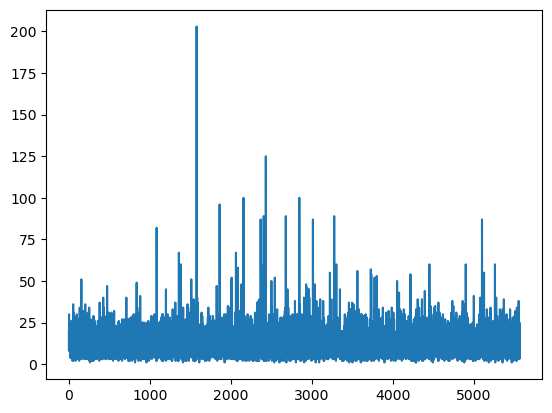

In [13]:
len_w = [len(i.split(' ')) for i in new_text]
plt.plot(len_w)
plt.show()

In [14]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [15]:
tfidf = TfidfVectorizer()
encoded_texts = tfidf.fit_transform(new_text).toarray()

In [16]:
encoded_texts

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(encoded_texts, data['label'].values, test_size=0.2, random_state=42)

In [18]:
# np.asarray(X_train)
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25963699, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

In [19]:
# xgboost
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20],  
    'learning_rate': [0.1, 0.01]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# xgb = XGBClassifier(n_estimators=100)
# xgb.fit(X_train, y_train)

Accuracy Score:  0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [20]:
# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [87]:
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.966117 
RandomForest: 0.979131 
KNeighbours: 0.900158 
